In [943]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from scipy import stats
import seaborn as sns

In [944]:
pd.set_option('display.max_columns',300)

In [945]:
dados = []

folder = 'json'

for elem in os.listdir(folder):
    if 'json' in elem:
        dados.append(json.loads(open(os.path.join(folder, elem),encoding='utf-8').read()) )
                 

In [946]:
dadosHibrido = []

folder2 = 'jsonHibrido'

for elem in os.listdir(folder2):
    if 'json' in elem:
        dadosHibrido.append(json.loads(open(os.path.join(folder2, elem),encoding='utf-8').read()) )
                 

In [947]:
dadosDesempenho = []

folder3 = 'jsonDesempenho'

for elem in os.listdir(folder3):
    if 'json' in elem:
        dadosDesempenho.append(json.loads(open(os.path.join(folder3, elem),encoding='utf-8').read()) )

In [948]:
colunas_nivel = ['tempoParado',
    'tempoMovimentando',
    'tempoAtirando',
    'tempoRecarregando',
    'tempoSliding',
    'tempoDash',
    'tempoPulando',
    'tempoCaindo',
    'tempoAgachado',
    'quantidadeTiros',
    'quantidadeTirosAcertados',
    'quantidadeTirosAcertadosCausandoDano',
    'quantidadeTirosAcertadosSemCausarDano',
    'quantidadeTirosErrados',
    'quantidadeAgachado',
    'quantidadePulos',
    'quantidadeDash',
    'quantidadeReloadApertando',
    'quantidadeReloadAuto',
    'distanciaPercorrida' ]

In [949]:
colunas_nivelD = ['ArousalLevel',
                  'dificuldadeExperimentada',
                  'densidade',
                  'desempenhoJogador',
    'tempoParado',
    'tempoMovimentando',
    'tempoAtirando',
    'tempoRecarregando',
    'tempoSliding',
    'tempoDash',
    'tempoPulando',
    'tempoCaindo',
    'tempoAgachado',
    'quantidadeTiros',
    'quantidadeTirosAcertados',
    'quantidadeTirosAcertadosCausandoDano',
    'quantidadeTirosAcertadosSemCausarDano',
    'quantidadeTirosErrados',
    'quantidadeAgachado',
    'quantidadePulos',
    'quantidadeDash',
    'quantidadeReloadApertando',
    'quantidadeReloadAuto',
    'distanciaPercorrida' ]

In [950]:
def parseiaNivelColuna(dados_json):

    dict_compl =  {}
    
    for nivel in dados_json['niveis']:
        dict_nivel = {}
        id_nivel = str(nivel['ID'])
        usou_cheat = [ nivel['cheat'] ] 
        
        
        
        dict_nivel['usou_cheat_'+ id_nivel] = usou_cheat
        dict_nivel['nota_dificuldade_' + id_nivel] = [nivel['notaDificuldade']]
        dict_nivel['dificuldade_apropriada_' + id_nivel] = [nivel['difuldadeApropriada']]
        dict_nivel['nivelTedioso_' + id_nivel] = [nivel['nivelTedioso']]
        dict_nivel['nivelDivertido_' + id_nivel] = [nivel['nivelDivertido']]
        dict_nivel['nivelFrustrante_' + id_nivel] = [nivel['nivelFrustrante']]
        dict_nivel['tempoTotal_' + id_nivel] = [nivel['tempoTotal']]
        dict_nivel['quantidadeMortes_' + id_nivel ] = [nivel['quantidadeMortes']]
       
         
        if not usou_cheat:
            #print(str(nivel['cheat']) + id_nivel)
            for column in colunas_nivel:
                #print(nivel['dadosAntesMorrer'][-1][column])                
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][-1][column] ]
        else:
            """
            encontra a melhor tentativa , a melhor tentativa foi 
            definida nos casos em que a pessoa não consegue passar
            como aquela em que o jogador conseguiu derrotar o maior número de inimigos.
            """
            
            melhor_tentativa = 0
            melhor_ini_derrotados = 0
            for i,tentativa in enumerate(nivel['dadosAntesMorrer']):
                if (len(tentativa['inimigosDerrotados']) > melhor_ini_derrotados):
                    melhor_ini_derrotados = len(tentativa['inimigosDerrotados'])
                    melhor_tentativa = i

            for column in colunas_nivel:
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][melhor_tentativa][column] ] 
                

        #print(dict_nivel)
        dict_compl = {**dict_compl , **dict_nivel}

    #print(dict_compl)
    df_nivel = pd.DataFrame(dict_compl)
    
    return df_nivel

In [951]:
def parseiaNivelColunaD(dados_json):

    dict_compl =  {}
    
    for nivel in dados_json['niveis']:
        dict_nivel = {}
        id_nivel = str(nivel['ID'])
        usou_cheat = [ nivel['cheat'] ] 
        
        
        
        dict_nivel['usou_cheat_'+ id_nivel] = usou_cheat
        dict_nivel['nota_dificuldade_' + id_nivel] = [nivel['notaDificuldade']]
        dict_nivel['dificuldade_apropriada_' + id_nivel] = [nivel['difuldadeApropriada']]
        dict_nivel['nivelTedioso_' + id_nivel] = [nivel['nivelTedioso']]
        dict_nivel['nivelDivertido_' + id_nivel] = [nivel['nivelDivertido']]
        dict_nivel['nivelFrustrante_' + id_nivel] = [nivel['nivelFrustrante']]
        dict_nivel['tempoTotal_' + id_nivel] = [nivel['tempoTotal']]
        dict_nivel['quantidadeMortes_' + id_nivel ] = [nivel['quantidadeMortes']]
       
         
        if not usou_cheat:
            #print(str(nivel['cheat']) + id_nivel)
            for column in colunas_nivelD:
                #print(nivel['dadosAntesMorrer'][-1][column])
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][-1][column] ]
        else:
            """
            encontra a melhor tentativa , a melhor tentativa foi 
            definida nos casos em que a pessoa não consegue passar
            como aquela em que o jogador conseguiu derrotar o maior número de inimigos.
            """
            
            melhor_tentativa = 0
            melhor_ini_derrotados = 0
            for i,tentativa in enumerate(nivel['dadosAntesMorrer']):
                if (len(tentativa['inimigosDerrotados']) > melhor_ini_derrotados):
                    melhor_ini_derrotados = len(tentativa['inimigosDerrotados'])
                    melhor_tentativa = i
            
            for column in colunas_nivelD:
                if column == 'ArousalLevel':
                    dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ float(nivel['dadosAntesMorrer'][melhor_tentativa][column]) + float(id_nivel) * 5 - 20 ] 
                else:
                    dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][melhor_tentativa][column] ] 
                

        #print(dict_nivel)
        dict_compl = {**dict_compl , **dict_nivel}

    #print(dict_compl)
    df_nivel = pd.DataFrame(dict_compl)
    
    return df_nivel

In [952]:
def parserDados(data):
    """ Recebe o json dos dados do teste e cria um dataFrame com todos os dados."""
    df  = []
    data.keys()
    #print ({key : [value] for key,value in (data['questionarioInicial']).items() })
    
    df_quest_inic = pd.DataFrame({'inicial_' + key : [value] for key,value in (data['questionarioInicial']).items() } )
    df_quest_final = pd.DataFrame({'final_' + key : [value] for key,value in (data['questionarioFinal']).items() } )
    df_nivel = parseiaNivelColuna(data)
    
    
    
    
    
    
    df = pd.concat([df_quest_inic, df_quest_final, df_nivel], sort=True, axis=1)
    return df

def parserDadosD(data):
    """ Recebe o json dos dados do teste e cria um dataFrame com todos os dados."""
    df  = []
    data.keys()
    #print ({key : [value] for key,value in (data['questionarioInicial']).items() })
    
    df_quest_inic = pd.DataFrame({'inicial_' + key : [value] for key,value in (data['questionarioInicial']).items() } )
    df_quest_final = pd.DataFrame({'final_' + key : [value] for key,value in (data['questionarioFinal']).items() } )
    df_nivel = parseiaNivelColunaD(data)
    
    
    
    
    
    
    df = pd.concat([df_quest_inic, df_quest_final, df_nivel], sort=True, axis=1)
    return df

dados_experimento = []
dados_experimento_Desempenho = []
dados_experimento_Hibrido = []
#print(type(dados_experimento))
for dado in dados:
    df_aux = parserDados(dado)  
    dados_experimento.append(df_aux)
    
for dado in dadosDesempenho:
    df_aux = parserDadosD(dado)  
    dados_experimento_Desempenho.append(df_aux)
    
for dado in dadosHibrido:
    df_aux = parserDadosD(dado)  
    dados_experimento_Hibrido.append(df_aux)
    

df_final = pd.concat(dados_experimento).reset_index(drop=True)
df_finalH = pd.concat(dados_experimento_Hibrido).reset_index(drop=True)
df_finalD = pd.concat(dados_experimento_Desempenho).reset_index(drop=True)


In [953]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [954]:
filtroCheat = (df_final.usou_cheat_0 == False) & (df_final.usou_cheat_1 == False) & (df_final.usou_cheat_2 == False) & (df_final.usou_cheat_3 == False) & (df_final.usou_cheat_4 == False) & (df_final.usou_cheat_5 == False) & (df_final.usou_cheat_6 == False) & (df_final.usou_cheat_7 == False) & (df_final.usou_cheat_8 == False)


In [955]:
df_final

,inicial_idade,inicial_sexo,inicial_q3,inicial_q4,inicial_q5,inicial_q6,inicial_q7,inicial_q8,inicial_q9_a,inicial_q9_b,inicial_q9_c,inicial_q9_d,final_q1_a,final_q1_b,final_q1_c,final_q1_d,final_q1_e,final_q1_f,final_q2,final_q3_a,final_q3_b,final_q3_c,final_q4_a,final_q4_b,final_q4_c,final_q4_d,final_q4_e,final_q4_f,final_q5_a,final_q5_b,final_q5_c,final_q5_d,final_q5_e,final_q5_f,final_q5_g,final_q5_h,usou_cheat_0,nota_dificuldade_0,dificuldade_apropriada_0,nivelTedioso_0,nivelDivertido_0,nivelFrustrante_0,tempoTotal_0,quantidadeMortes_0,tempoParado_nvl_0,tempoMovimentando_nvl_0,tempoAtirando_nvl_0,tempoRecarregando_nvl_0,tempoSliding_nvl_0,tempoDash_nvl_0,tempoPulando_nvl_0,tempoCaindo_nvl_0,tempoAgachado_nvl_0,quantidadeTiros_nvl_0,quantidadeTirosAcertados_nvl_0,quantidadeTirosAcertadosCausandoDano_nvl_0,quantidadeTirosAcertadosSemCausarDano_nvl_0,quantidadeTirosErrados_nvl_0,quantidadeAgachado_nvl_0,quantidadePulos_nvl_0,quantidadeDash_nvl_0,quantidadeReloadApertando_nvl_0,quantidadeReloadAuto_nvl_0,distanciaPercorrida_nvl_0,usou_cheat_1,nota_dificuldade_1,dificuldade_apropriada_1,nivelTedioso_1,nivelDivertido_1,nivelFrustrante_1,tempoTotal_1,quantidadeMortes_1,tempoParado_nvl_1,tempoMovimentando_nvl_1,tempoAtirando_nvl_1,tempoRecarregando_nvl_1,tempoSliding_nvl_1,tempoDash_nvl_1,tempoPulando_nvl_1,tempoCaindo_nvl_1,tempoAgachado_nvl_1,quantidadeTiros_nvl_1,quantidadeTirosAcertados_nvl_1,quantidadeTirosAcertadosCausandoDano_nvl_1,quantidadeTirosAcertadosSemCausarDano_nvl_1,quantidadeTirosErrados_nvl_1,quantidadeAgachado_nvl_1,quantidadePulos_nvl_1,quantidadeDash_nvl_1,quantidadeReloadApertando_nvl_1,quantidadeReloadAuto_nvl_1,distanciaPercorrida_nvl_1,usou_cheat_2,nota_dificuldade_2,dificuldade_apropriada_2,nivelTedioso_2,nivelDivertido_2,nivelFrustrante_2,tempoTotal_2,quantidadeMortes_2,tempoParado_nvl_2,tempoMovimentando_nvl_2,tempoAtirando_nvl_2,tempoRecarregando_nvl_2,tempoSliding_nvl_2,tempoDash_nvl_2,tempoPulando_nvl_2,tempoCaindo_nvl_2,tempoAgachado_nvl_2,quantidadeTiros_nvl_2,quantidadeTirosAcertados_nvl_2,quantidadeTirosAcertadosCausandoDano_nvl_2,quantidadeTirosAcertadosSemCausarDano_nvl_2,quantidadeTirosErrados_nvl_2,quantidadeAgachado_nvl_2,quantidadePulos_nvl_2,quantidadeDash_nvl_2,quantidadeReloadApertando_nvl_2,quantidadeReloadAuto_nvl_2,distanciaPercorrida_nvl_2,usou_cheat_3,nota_dificuldade_3,dificuldade_apropriada_3,nivelTedioso_3,nivelDivertido_3,nivelFrustrante_3,tempoTotal_3,quantidadeMortes_3,tempoParado_nvl_3,tempoMovimentando_nvl_3,tempoAtirando_nvl_3,tempoRecarregando_nvl_3,tempoSliding_nvl_3,tempoDash_nvl_3,tempoPulando_nvl_3,tempoCaindo_nvl_3,tempoAgachado_nvl_3,quantidadeTiros_nvl_3,quantidadeTirosAcertados_nvl_3,quantidadeTirosAcertadosCausandoDano_nvl_3,quantidadeTirosAcertadosSemCausarDano_nvl_3,quantidadeTirosErrados_nvl_3,quantidadeAgachado_nvl_3,quantidadePulos_nvl_3,quantidadeDash_nvl_3,quantidadeReloadApertando_nvl_3,quantidadeReloadAuto_nvl_3,distanciaPercorrida_nvl_3,usou_cheat_4,nota_dificuldade_4,dificuldade_apropriada_4,nivelTedioso_4,nivelDivertido_4,nivelFrustrante_4,tempoTotal_4,quantidadeMortes_4,tempoParado_nvl_4,tempoMovimentando_nvl_4,tempoAtirando_nvl_4,tempoRecarregando_nvl_4,tempoSliding_nvl_4,tempoDash_nvl_4,tempoPulando_nvl_4,tempoCaindo_nvl_4,tempoAgachado_nvl_4,quantidadeTiros_nvl_4,quantidadeTirosAcertados_nvl_4,quantidadeTirosAcertadosCausandoDano_nvl_4,quantidadeTirosAcertadosSemCausarDano_nvl_4,quantidadeTirosErrados_nvl_4,quantidadeAgachado_nvl_4,quantidadePulos_nvl_4,quantidadeDash_nvl_4,quantidadeReloadApertando_nvl_4,quantidadeReloadAuto_nvl_4,distanciaPercorrida_nvl_4,usou_cheat_5,nota_dificuldade_5,dificuldade_apropriada_5,nivelTedioso_5,nivelDivertido_5,nivelFrustrante_5,tempoTotal_5,quantidadeMortes_5,tempoParado_nvl_5,tempoMovimentando_nvl_5,tempoAtirando_nvl_5,tempoRecarregando_nvl_5,tempoSliding_nvl_5,tempoDash_nvl_5,tempoPulando_nvl_5,tempoCaindo_nvl_5,tempoAgachado_nvl_5,quantidadeTiros_nvl_5,quantidadeTirosAcertados_nvl_5,quantidadeTirosAcertadosCau

In [956]:
df_finalD

,inicial_idade,inicial_sexo,inicial_q3,inicial_q4,inicial_q5,inicial_q6,inicial_q7,inicial_q8,inicial_q9_a,inicial_q9_b,inicial_q9_c,inicial_q9_d,final_q1_a,final_q1_b,final_q1_c,final_q1_d,final_q1_e,final_q1_f,final_q2,final_q3_a,final_q3_b,final_q3_c,final_q4_a,final_q4_b,final_q4_c,final_q4_d,final_q4_e,final_q4_f,final_q5_a,final_q5_b,final_q5_c,final_q5_d,final_q5_e,final_q5_f,final_q5_g,final_q5_h,usou_cheat_0,nota_dificuldade_0,dificuldade_apropriada_0,nivelTedioso_0,nivelDivertido_0,nivelFrustrante_0,tempoTotal_0,quantidadeMortes_0,ArousalLevel_nvl_0,dificuldadeExperimentada_nvl_0,densidade_nvl_0,desempenhoJogador_nvl_0,tempoParado_nvl_0,tempoMovimentando_nvl_0,tempoAtirando_nvl_0,tempoRecarregando_nvl_0,tempoSliding_nvl_0,tempoDash_nvl_0,tempoPulando_nvl_0,tempoCaindo_nvl_0,tempoAgachado_nvl_0,quantidadeTiros_nvl_0,quantidadeTirosAcertados_nvl_0,quantidadeTirosAcertadosCausandoDano_nvl_0,quantidadeTirosAcertadosSemCausarDano_nvl_0,quantidadeTirosErrados_nvl_0,quantidadeAgachado_nvl_0,quantidadePulos_nvl_0,quantidadeDash_nvl_0,quantidadeReloadApertando_nvl_0,quantidadeReloadAuto_nvl_0,distanciaPercorrida_nvl_0,usou_cheat_1,nota_dificuldade_1,dificuldade_apropriada_1,nivelTedioso_1,nivelDivertido_1,nivelFrustrante_1,tempoTotal_1,quantidadeMortes_1,ArousalLevel_nvl_1,dificuldadeExperimentada_nvl_1,densidade_nvl_1,desempenhoJogador_nvl_1,tempoParado_nvl_1,tempoMovimentando_nvl_1,tempoAtirando_nvl_1,tempoRecarregando_nvl_1,tempoSliding_nvl_1,tempoDash_nvl_1,tempoPulando_nvl_1,tempoCaindo_nvl_1,tempoAgachado_nvl_1,quantidadeTiros_nvl_1,quantidadeTirosAcertados_nvl_1,quantidadeTirosAcertadosCausandoDano_nvl_1,quantidadeTirosAcertadosSemCausarDano_nvl_1,quantidadeTirosErrados_nvl_1,quantidadeAgachado_nvl_1,quantidadePulos_nvl_1,quantidadeDash_nvl_1,quantidadeReloadApertando_nvl_1,quantidadeReloadAuto_nvl_1,distanciaPercorrida_nvl_1,usou_cheat_2,nota_dificuldade_2,dificuldade_apropriada_2,nivelTedioso_2,nivelDivertido_2,nivelFrustrante_2,tempoTotal_2,quantidadeMortes_2,ArousalLevel_nvl_2,dificuldadeExperimentada_nvl_2,densidade_nvl_2,desempenhoJogador_nvl_2,tempoParado_nvl_2,tempoMovimentando_nvl_2,tempoAtirando_nvl_2,tempoRecarregando_nvl_2,tempoSliding_nvl_2,tempoDash_nvl_2,tempoPulando_nvl_2,tempoCaindo_nvl_2,tempoAgachado_nvl_2,quantidadeTiros_nvl_2,quantidadeTirosAcertados_nvl_2,quantidadeTirosAcertadosCausandoDano_nvl_2,quantidadeTirosAcertadosSemCausarDano_nvl_2,quantidadeTirosErrados_nvl_2,quantidadeAgachado_nvl_2,quantidadePulos_nvl_2,quantidadeDash_nvl_2,quantidadeReloadApertando_nvl_2,quantidadeReloadAuto_nvl_2,distanciaPercorrida_nvl_2,usou_cheat_3,nota_dificuldade_3,dificuldade_apropriada_3,nivelTedioso_3,nivelDivertido_3,nivelFrustrante_3,tempoTotal_3,quantidadeMortes_3,ArousalLevel_nvl_3,dificuldadeExperimentada_nvl_3,densidade_nvl_3,desempenhoJogador_nvl_3,tempoParado_nvl_3,tempoMovimentando_nvl_3,tempoAtirando_nvl_3,tempoRecarregando_nvl_3,tempoSliding_nvl_3,tempoDash_nvl_3,...,densidade_nvl_4,desempenhoJogador_nvl_4,tempoParado_nvl_4,tempoMovimentando_nvl_4,tempoAtirando_nvl_4,tempoRecarregando_nvl_4,tempoSliding_nvl_4,tempoDash_nvl_4,tempoPulando_nvl_4,tempoCaindo_nvl_4,tempoAgachado_nvl_4,quantidadeTiros_nvl_4,quantidadeTirosAcertados_nvl_4,quantidadeTirosAcertadosCausandoDano_nvl_4,quantidadeTirosAcertadosSemCausarDano_nvl_4,quantidadeTirosErrados_nvl_4,quantidadeAgachado_nvl_4,quantidadePulos_nvl_4,quantidadeDash_nvl_4,quantidadeReloadApertando_nvl_4,quantidadeReloadAuto_nvl_4,distanciaPercorrida_nvl_4,usou_cheat_5,nota_dificuldade_5,dificuldade_apropriada_5,nivelTedioso_5,nivelDivertido_5,nivelFrustrante_5,tempoTotal_5,quantidadeMortes_5,ArousalLevel_nvl_5,dificuldadeExperimentada_nvl_5,densidade_nvl_5,desempenhoJogador_nvl_5,tempoParado_nvl_5,tempoMovimentando_nvl_5,tempoAtirando_nvl_5,tempoRecarregando_nvl_5,tempoSliding_nvl_5,tempoDash_nvl_5,tempoPulando_nvl_5,tempoCaindo_nvl_5,tempoAgachado_nvl_5,quantidadeTiros_nvl_5,quantidadeTirosAcertados_nvl_5,quantidadeTirosAcertadosCausandoDano_nvl_5,quantida

In [957]:
df_finalH

,inicial_idade,inicial_sexo,inicial_q3,inicial_q4,inicial_q5,inicial_q6,inicial_q7,inicial_q8,inicial_q9_a,inicial_q9_b,inicial_q9_c,inicial_q9_d,final_q1_a,final_q1_b,final_q1_c,final_q1_d,final_q1_e,final_q1_f,final_q2,final_q3_a,final_q3_b,final_q3_c,final_q4_a,final_q4_b,final_q4_c,final_q4_d,final_q4_e,final_q4_f,final_q5_a,final_q5_b,final_q5_c,final_q5_d,final_q5_e,final_q5_f,final_q5_g,final_q5_h,usou_cheat_0,nota_dificuldade_0,dificuldade_apropriada_0,nivelTedioso_0,nivelDivertido_0,nivelFrustrante_0,tempoTotal_0,quantidadeMortes_0,ArousalLevel_nvl_0,dificuldadeExperimentada_nvl_0,densidade_nvl_0,desempenhoJogador_nvl_0,tempoParado_nvl_0,tempoMovimentando_nvl_0,tempoAtirando_nvl_0,tempoRecarregando_nvl_0,tempoSliding_nvl_0,tempoDash_nvl_0,tempoPulando_nvl_0,tempoCaindo_nvl_0,tempoAgachado_nvl_0,quantidadeTiros_nvl_0,quantidadeTirosAcertados_nvl_0,quantidadeTirosAcertadosCausandoDano_nvl_0,quantidadeTirosAcertadosSemCausarDano_nvl_0,quantidadeTirosErrados_nvl_0,quantidadeAgachado_nvl_0,quantidadePulos_nvl_0,quantidadeDash_nvl_0,quantidadeReloadApertando_nvl_0,quantidadeReloadAuto_nvl_0,distanciaPercorrida_nvl_0,usou_cheat_1,nota_dificuldade_1,dificuldade_apropriada_1,nivelTedioso_1,nivelDivertido_1,nivelFrustrante_1,tempoTotal_1,quantidadeMortes_1,ArousalLevel_nvl_1,dificuldadeExperimentada_nvl_1,densidade_nvl_1,desempenhoJogador_nvl_1,tempoParado_nvl_1,tempoMovimentando_nvl_1,tempoAtirando_nvl_1,tempoRecarregando_nvl_1,tempoSliding_nvl_1,tempoDash_nvl_1,tempoPulando_nvl_1,tempoCaindo_nvl_1,tempoAgachado_nvl_1,quantidadeTiros_nvl_1,quantidadeTirosAcertados_nvl_1,quantidadeTirosAcertadosCausandoDano_nvl_1,quantidadeTirosAcertadosSemCausarDano_nvl_1,quantidadeTirosErrados_nvl_1,quantidadeAgachado_nvl_1,quantidadePulos_nvl_1,quantidadeDash_nvl_1,quantidadeReloadApertando_nvl_1,quantidadeReloadAuto_nvl_1,distanciaPercorrida_nvl_1,usou_cheat_2,nota_dificuldade_2,dificuldade_apropriada_2,nivelTedioso_2,nivelDivertido_2,nivelFrustrante_2,tempoTotal_2,quantidadeMortes_2,ArousalLevel_nvl_2,dificuldadeExperimentada_nvl_2,densidade_nvl_2,desempenhoJogador_nvl_2,tempoParado_nvl_2,tempoMovimentando_nvl_2,tempoAtirando_nvl_2,tempoRecarregando_nvl_2,tempoSliding_nvl_2,tempoDash_nvl_2,tempoPulando_nvl_2,tempoCaindo_nvl_2,tempoAgachado_nvl_2,quantidadeTiros_nvl_2,quantidadeTirosAcertados_nvl_2,quantidadeTirosAcertadosCausandoDano_nvl_2,quantidadeTirosAcertadosSemCausarDano_nvl_2,quantidadeTirosErrados_nvl_2,quantidadeAgachado_nvl_2,quantidadePulos_nvl_2,quantidadeDash_nvl_2,quantidadeReloadApertando_nvl_2,quantidadeReloadAuto_nvl_2,distanciaPercorrida_nvl_2,usou_cheat_3,nota_dificuldade_3,dificuldade_apropriada_3,nivelTedioso_3,nivelDivertido_3,nivelFrustrante_3,tempoTotal_3,quantidadeMortes_3,ArousalLevel_nvl_3,dificuldadeExperimentada_nvl_3,densidade_nvl_3,desempenhoJogador_nvl_3,tempoParado_nvl_3,tempoMovimentando_nvl_3,tempoAtirando_nvl_3,tempoRecarregando_nvl_3,tempoSliding_nvl_3,tempoDash_nvl_3,...,densidade_nvl_4,desempenhoJogador_nvl_4,tempoParado_nvl_4,tempoMovimentando_nvl_4,tempoAtirando_nvl_4,tempoRecarregando_nvl_4,tempoSliding_nvl_4,tempoDash_nvl_4,tempoPulando_nvl_4,tempoCaindo_nvl_4,tempoAgachado_nvl_4,quantidadeTiros_nvl_4,quantidadeTirosAcertados_nvl_4,quantidadeTirosAcertadosCausandoDano_nvl_4,quantidadeTirosAcertadosSemCausarDano_nvl_4,quantidadeTirosErrados_nvl_4,quantidadeAgachado_nvl_4,quantidadePulos_nvl_4,quantidadeDash_nvl_4,quantidadeReloadApertando_nvl_4,quantidadeReloadAuto_nvl_4,distanciaPercorrida_nvl_4,usou_cheat_5,nota_dificuldade_5,dificuldade_apropriada_5,nivelTedioso_5,nivelDivertido_5,nivelFrustrante_5,tempoTotal_5,quantidadeMortes_5,ArousalLevel_nvl_5,dificuldadeExperimentada_nvl_5,densidade_nvl_5,desempenhoJogador_nvl_5,tempoParado_nvl_5,tempoMovimentando_nvl_5,tempoAtirando_nvl_5,tempoRecarregando_nvl_5,tempoSliding_nvl_5,tempoDash_nvl_5,tempoPulando_nvl_5,tempoCaindo_nvl_5,tempoAgachado_nvl_5,quantidadeTiros_nvl_5,quantidadeTirosAcertados_nvl_5,quantidadeTirosAcertadosCausandoDano_nvl_5,quantida

In [958]:
def pegaColunas(data, query):
    'retorna colunas com base em uma query'
    columns = [x for x in data.columns if query in x]
    
    values = data[columns]
    
    return values   

In [959]:
teste = pegaColunas(df_final, 'nivelDivertido')
teste = teste.replace(2,5).replace(1,3)
teste

,nivelDivertido_0,nivelDivertido_1,nivelDivertido_2,nivelDivertido_3,nivelDivertido_4,nivelDivertido_5,nivelDivertido_6,nivelDivertido_7,nivelDivertido_8
0,5,3,4,5,5,5,3,4,5
1,5,3,3,3,4,4,4,3,4
2,5,5,5,5,5,5,5,5,5
3,5,4,4,3,4,4,4,5,5
4,5,5,5,5,4,5,4,5,5
5,5,3,3,4,4,4,5,4,5
6,5,3,5,5,5,3,3,3,3
7,5,4,4,4,5,4,4,5,4
8,4,3,4,4,4,5,4,3,3
9,5,3,4,5,5,3,4,4,5


final_q2    3.105263
dtype: float64


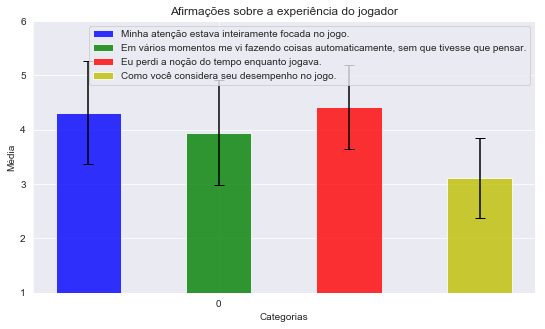

In [960]:
des_col = pegaColunas(df_final, 'final_q2')
print(des_col.mean())
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'final_q3_a')
div_col = pegaColunas(df_final, 'final_q3_b')
frus_col = pegaColunas(df_final, 'final_q3_c')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

fig,ax = plt.subplots(figsize=(9, 5))

ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]
des = des_col.mean().values[0]

ted_error = ted_col.std().values[0]
div_error = div_col.std().values[0]
frus_error = frus_col.std().values[0]
des_error = des_col.std().values[0]
n_groups = 1

index = np.arange(n_groups)[0:]
bar_width = 50
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Minha atenção estava inteiramente focada no jogo.', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'Em vários momentos me vi fazendo coisas automaticamente, sem que tivesse que pensar.', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'Eu perdi a noção do tempo enquanto jogava.', yerr = frus_error, capsize=5)

rects4 = plt.bar(index  + bar_width * 3 - 0.12 , des , bar_width  * 0.5 , alpha = opacity, color = 'y' , label = 'Como você considera seu desempenho no jogo.', yerr = des_error, capsize=5)


plt.xlabel('Categorias')
plt.ylabel('Média')
plt.title('Afirmações sobre a experiência do jogador')
plt.xticks(index +  bar_width, (index))
plt.legend()

plt.ylim(1,6)
#plt.tight_layout()
fig.savefig('GraficoImersao.png')

In [961]:

des_col = pegaColunas(df_final, 'final_q2')

#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'final_q3_a')
div_col = pegaColunas(df_final, 'final_q3_b')
frus_col = pegaColunas(df_final, 'final_q3_c')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)


ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]
des = des_col.mean().values[0]

print("ATENCAO: ", ted)
print("AUTO: ",div)
print("PERDINOCAO: ",frus)
print("desemp: ",des)
print()


des_col = pegaColunas(df_finalD, 'final_q2')

#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_finalD, 'final_q3_a')
div_col = pegaColunas(df_finalD, 'final_q3_b')
frus_col = pegaColunas(df_finalD, 'final_q3_c')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)


ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]
des = des_col.mean().values[0]

print("ATENCAO: ", ted)
print("AUTO: ",div)
print("PERDINOCAO: ",frus)
print("desemp: ",des)

print()

des_col = pegaColunas(df_finalH, 'final_q2')

#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_finalH, 'final_q3_a')
div_col = pegaColunas(df_finalH, 'final_q3_b')
frus_col = pegaColunas(df_finalH, 'final_q3_c')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)


ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]
des = des_col.mean().values[0]

print("ATENCAO: ", ted)
print("AUTO: ",div)
print("PERDINOCAO: ",frus)
print("desemp: ",des)


ATENCAO:  4.315789473684211
AUTO:  3.9473684210526314
PERDINOCAO:  4.421052631578948
desemp:  3.1052631578947367

ATENCAO:  4.636363636363637
AUTO:  3.9545454545454546
PERDINOCAO:  4.454545454545454
desemp:  3.590909090909091

ATENCAO:  4.75
AUTO:  4.25
PERDINOCAO:  4.55
desemp:  3.8


In [962]:
ted_col = pegaColunas(df_finalD, 'final_q4_a')
div_col = pegaColunas(df_finalD, 'final_q4_b')
frus_col = pegaColunas(df_finalD, 'final_q4_c')


ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]

print("desafiador ", ted)
print("superei os desafios ",div)
print("dificuldadeapropriada ",frus)


ted_col = pegaColunas(df_finalH, 'final_q4_a')
div_col = pegaColunas(df_finalH, 'final_q4_b')
frus_col = pegaColunas(df_finalH, 'final_q4_c')


ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]

print("desafiador ", ted)
print("superei os desafios ",div)
print("dificuldadeapropriada ",frus)

desafiador  3.6818181818181817
superei os desafios  4.409090909090909
dificuldadeapropriada  4.090909090909091
desafiador  3.55
superei os desafios  4.45
dificuldadeapropriada  4.2


In [963]:
teste = pegaColunas(df_final, 'tempoTotal')

print((df_final.tempoTotal_0 + df_final.tempoTotal_1 + df_final.tempoTotal_2 + df_final.tempoTotal_3 + df_final.tempoTotal_4 + df_final.tempoTotal_5 + df_final.tempoTotal_6 + df_final.tempoTotal_7 + df_final.tempoTotal_8).max
    ()) 

3636.5478286743164


In [964]:
teste = pegaColunas(df_final, 'inicial_q9_b')

for i in range(1,6):
    print(i,teste[df_final.inicial_q9_b == i].count())

1 inicial_q9_b    7
dtype: int64
2 inicial_q9_b    7
dtype: int64
3 inicial_q9_b    4
dtype: int64
4 inicial_q9_b    1
dtype: int64
5 inicial_q9_b    0
dtype: int64


In [965]:
teste = pegaColunas(df_final, 'inicial_q9_c')

for i in range(1,6):
    print(i,teste[df_final.inicial_q9_c == i].count())

1 inicial_q9_c    12
dtype: int64
2 inicial_q9_c    2
dtype: int64
3 inicial_q9_c    4
dtype: int64
4 inicial_q9_c    1
dtype: int64
5 inicial_q9_c    0
dtype: int64


In [966]:
teste = pegaColunas(df_final, 'inicial_q9_d')

for i in range(1,6):
    print(i,teste[df_final.inicial_q9_d == i].count())

1 inicial_q9_d    1
dtype: int64
2 inicial_q9_d    3
dtype: int64
3 inicial_q9_d    3
dtype: int64
4 inicial_q9_d    1
dtype: int64
5 inicial_q9_d    11
dtype: int64


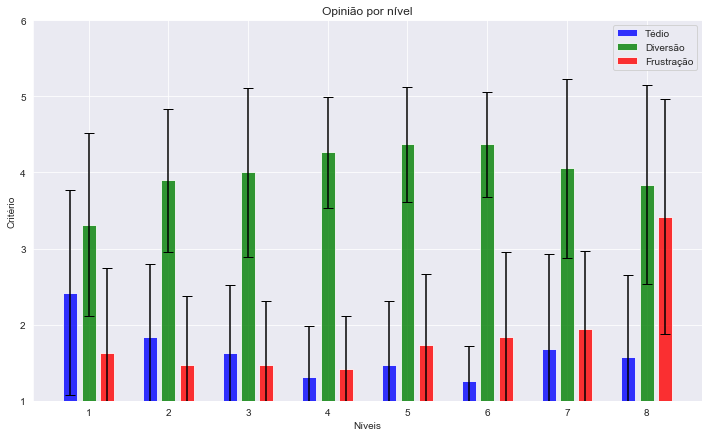

In [967]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelTedioso')
div_col = pegaColunas(df_final, 'nivelDivertido')
frus_col = pegaColunas(df_final, 'nivelFrustrante')

#div_col["nivelDivertido_1"].replace(1, 5, inplace=True)
#print(div_col)


#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[1:]
div = div_col.mean().values[1:]
frus = frus_col.mean().values[1:]

ted_error = ted_col.std().values[1:]
div_error = div_col.std().values[1:]
frus_error = frus_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(12, 7))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Tédio', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'Diversão', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'Frustração', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Opinião por nível')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
plt.ylim(1,6)
fig.savefig('OpiniaoXNivel.png')


In [968]:
def plotaColunaCheat(data, query):
    'retorna colunas com base em uma query'
    columns = [x for x in data.columns if query in x]
    
    values = data[columns]
    
    return values   

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


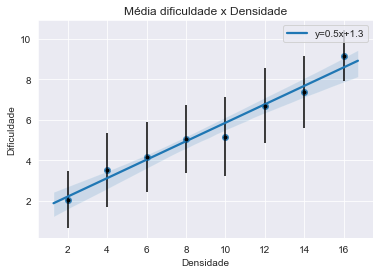

In [969]:
teste = pegaColunas(df_final , 'nota_dificuldade')

fig,ax = plt.subplots()

plt.title('Média dificuldade x Densidade') 

x  = [ i*2 for i in range (1, 9)]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.xlabel('Densidade')
plt.ylabel('Dificuldade')
fig.savefig("dificuldadexdensidade.png")

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


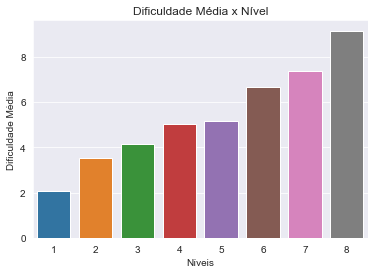

<Figure size 360x720 with 0 Axes>

In [970]:
teste = pegaColunas(df_final , 'nota_dificuldade')


fig,ax = plt.subplots()

plt.title('Dificuldade Média x Nível') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")

plt.xlabel('Níveis')
plt.ylabel('Dificuldade Média')

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.barplot(x, teste.mean().values[1:])

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))
fig.savefig('dificuldadexnivel.png')

[[1.         0.86920365]
 [0.86920365 1.        ]] 0.7555149780387901


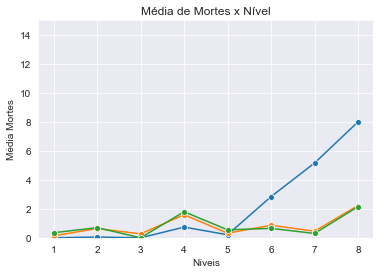

In [971]:
teste = pegaColunas(df_final , 'quantidadeMortes')
testeD = pegaColunas(df_finalD , 'quantidadeMortes')
testeH = pegaColunas(df_finalH , 'quantidadeMortes')

fig,ax = plt.subplots()

plt.title('Média de Mortes x Nível') 

x  = [1,2,3,4,5,6,7,8]
sns.set_style("darkgrid")



slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, teste.mean().values[1:] , marker='o')
sns.lineplot(x, testeD.mean().values[1:] , marker='o')
sns.lineplot(x, testeH.mean().values[1:] , marker='o')

plt.xlabel('Níveis')
plt.ylabel('Média Mortes')
plt.ylim(0,15)

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

fig.savefig('Mortes.png')


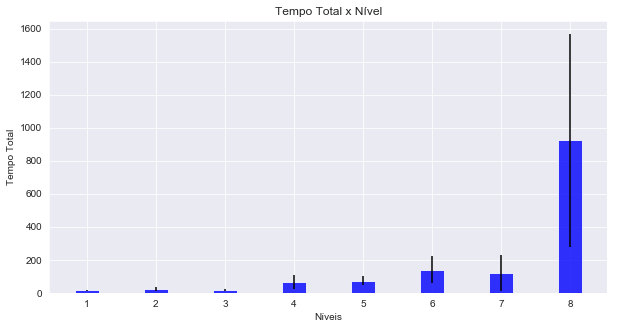

In [972]:
#Gerar gráfico de nivel x tempo medio total

tempo_total_col = pegaColunas(df_final[filtroCheat], 'tempoTotal_')
tempo_total_mean = tempo_total_col.mean().values[1:]
tempo_total_std = tempo_total_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , tempo_total_mean , bar_width  , alpha = opacity, color = 'b', yerr = tempo_total_std)
plt.xlabel('Níveis')
plt.ylabel('Tempo Total')
plt.title('Tempo Total x Nível')
plt.xticks(index , (index))
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tempoTotalXnivel.png')



In [973]:
tempoTotal = (df_final.tempoTotal_0 + df_final.tempoTotal_1 + df_final.tempoTotal_2 + df_final.tempoTotal_3 + df_final.tempoTotal_4 + df_final.tempoTotal_5 + df_final.tempoTotal_6 + df_final.tempoTotal_7 + df_final.tempoTotal_8)
tempoTotalD =(df_finalD.tempoTotal_0 + df_finalD.tempoTotal_1 + df_finalD.tempoTotal_2 + df_finalD.tempoTotal_3 + df_finalD.tempoTotal_4 + df_finalD.tempoTotal_5 + df_finalD.tempoTotal_6 + df_finalD.tempoTotal_7 + df_finalD.tempoTotal_8)
tempoTotalH =(df_finalH.tempoTotal_0 + df_finalH.tempoTotal_1 + df_finalH.tempoTotal_2 + df_finalH.tempoTotal_3 + df_finalH.tempoTotal_4 + df_finalH.tempoTotal_5 + df_finalH.tempoTotal_6 + df_finalH.tempoTotal_7 + df_finalH.tempoTotal_8)

print("TempoMedio:",tempoTotal.mean(), tempoTotalD.mean(), tempoTotalH.mean())
print("TempoMax:",tempoTotal.max(), tempoTotalD.max(), tempoTotalH.max())
print("TempoMin:",tempoTotal.min(), tempoTotalD.min(), tempoTotalH.min())

TempoMedio: 1601.2141888267115 922.2564304525202 875.0742955207825
TempoMax: 3636.5478286743164 1339.208927154541 1432.7597961425781
TempoMin: 497.51799964904785 487.5609531402588 457.1105136871338


array([28.03118859, 29.96449415, 33.20715197, 40.40325631, 35.80549231,
       45.99775268, 53.80955957, 68.35954694])

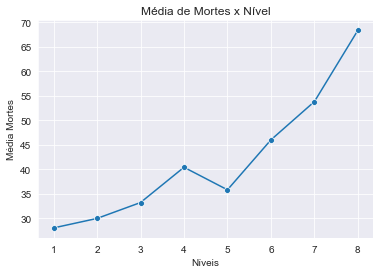

In [975]:
testeH = pegaColunas(df_finalH, 'ArousalLevel')

fig,ax = plt.subplots()

plt.title('Média de Mortes x Nível') 

x  = [1,2,3,4,5,6,7,8]
sns.set_style("darkgrid")

testeHM = testeH.mean().values[1:]
testeHM[4] = testeHM[4] - 7
print()

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, testeHM , marker='o')

plt.xlabel('Níveis')
plt.ylabel('Média Mortes')


fig.savefig('Mortes.png')
testeHM

################

####################

############

In [976]:
##Variação Idade

testeD = pegaColunas(df_finalD , 'inicial_idade').replace(15,18).replace(17,18)
testeH = pegaColunas(df_finalH , 'inicial_idade')

print("Idade Desempenho: ", int(testeD.min()), int(testeD.max()))
print("Idade Hibrido: ", int(testeH.min()), int(testeH.max()))

Idade Desempenho:  18 28
Idade Hibrido:  18 30


In [977]:
##Porcentagem Gênero
qtd = df_finalD["inicial_sexo"].count()
qtd_h = df_finalD["inicial_sexo"][df_finalD.inicial_sexo == 'Homem'].count()
qtd_m = df_finalD["inicial_sexo"][df_finalD.inicial_sexo == 'Mulher'].count()

print("Desempenho")
print("quantidade pessoas:", qtd) 
print("quantidade h:", qtd_h/qtd*100) 
print("quantidade m:", qtd_m/qtd*100) 

##Porcentagem Gênero
qtd = df_finalH["inicial_sexo"].count()
qtd_h = df_finalH["inicial_sexo"][df_finalH.inicial_sexo == 'Homem'].count()
qtd_m = df_finalH["inicial_sexo"][df_finalH.inicial_sexo == 'Mulher'].count()

print("Hibrido")
print("quantidade pessoas:", qtd) 
print("quantidade h:", qtd_h/qtd*100) 
print("quantidade m:", qtd_m/qtd*100) 

Desempenho
quantidade pessoas: 22
quantidade h: 90.9090909090909
quantidade m: 9.090909090909092
Hibrido
quantidade pessoas: 20
quantidade h: 85.0
quantidade m: 15.0


In [978]:
##questionario inicial dados - ADD DESEMPENHO

##Variação Idade

casual = pegaColunas(df_finalD , 'inicial_q3')
plat = pegaColunas(df_finalD , 'inicial_q4')
shooter = pegaColunas(df_finalD , 'inicial_q5')
platshooter = pegaColunas(df_finalD , 'inicial_q6')
gostaPlataforma = pegaColunas(df_finalD , 'inicial_q7')

difEscolha = pegaColunas(df_finalD , 'inicial_q8')

tablet = pegaColunas(df_finalD , 'inicial_q9_a')
consoleMesa = pegaColunas(df_finalD , 'inicial_q9_b')
consolePortatil = pegaColunas(df_finalD , 'inicial_q9_c')
computadorPessoal = pegaColunas(df_finalD , 'inicial_q9_d')


print("Desempenho")

print("casualMean", float(casual.mean()))
print("platformer", float(plat.mean()))
print(plat.groupby('inicial_q4').size())

print("shooter", float(shooter.mean()))
print(shooter.groupby('inicial_q5').size())
print("plat/shooter", float(platshooter.mean()))
print(platshooter.groupby('inicial_q6').size())

print("gosta plataforma", float(gostaPlataforma.mean()))

print(difEscolha.groupby('inicial_q8').size())

print("tablet:",float(tablet.mean()),"pc:", float(computadorPessoal.mean()), "Portatil:",float(consolePortatil.mean()),"videogame:", float( consoleMesa.mean()))



##questionario inicial dados - ADD DESEMPENHO

##Variação Idade

casual = pegaColunas(df_finalH , 'inicial_q3')
plat = pegaColunas(df_finalH , 'inicial_q4')
shooter = pegaColunas(df_finalH , 'inicial_q5')
platshooter = pegaColunas(df_finalH , 'inicial_q6')
gostaPlataforma = pegaColunas(df_finalH , 'inicial_q7')

difEscolha = pegaColunas(df_finalH , 'inicial_q8')

tablet = pegaColunas(df_finalH , 'inicial_q9_a')
consoleMesa = pegaColunas(df_finalH , 'inicial_q9_b')
consolePortatil = pegaColunas(df_finalH , 'inicial_q9_c')
computadorPessoal = pegaColunas(df_finalH , 'inicial_q9_d')


print("Hibrido")

print("casualMean", float(casual.mean()))
print("platformer", float(plat.mean()))
print(plat.groupby('inicial_q4').size())

print("shooter", float(shooter.mean()))
print(shooter.groupby('inicial_q5').size())
print("plat/shooter", float(platshooter.mean()))
print(platshooter.groupby('inicial_q6').size())

print("gosta plataforma", float(gostaPlataforma.mean()))

print(difEscolha.groupby('inicial_q8').size())

print("tablet:",float(tablet.mean()),"pc:", float(computadorPessoal.mean()), "Portatil:",float(consolePortatil.mean()),"videogame:", float( consoleMesa.mean()))

Desempenho
casualMean 3.8181818181818183
platformer 3.6818181818181817
inicial_q4
1    2
2    3
3    4
4    4
5    9
dtype: int64
shooter 3.9545454545454546
inicial_q5
1     1
2     3
3     3
4     4
5    11
dtype: int64
plat/shooter 2.8181818181818183
inicial_q6
1    6
2    6
3    1
4    4
5    5
dtype: int64
gosta plataforma 3.8636363636363638
inicial_q8
Difícil     7
Fácil       1
Médio      14
dtype: int64
tablet: 2.5 pc: 3.8181818181818183 Portatil: 1.5909090909090908 videogame: 2.4545454545454546
Hibrido
casualMean 3.4
platformer 3.8
inicial_q4
1    2
2    1
3    5
4    3
5    9
dtype: int64
shooter 3.7
inicial_q5
1    2
2    3
3    2
4    5
5    8
dtype: int64
plat/shooter 3.3
inicial_q6
1    3
2    2
3    6
4    4
5    5
dtype: int64
gosta plataforma 4.0
inicial_q8
Difícil     8
Fácil       1
Médio      11
dtype: int64
tablet: 2.85 pc: 3.35 Portatil: 1.45 videogame: 1.65


[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


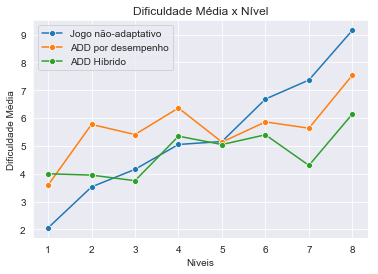

<Figure size 360x720 with 0 Axes>

In [979]:
##dificuldade Media Comparacao

teste = pegaColunas(df_final , 'nota_dificuldade')
testeD = pegaColunas(df_finalD , 'nota_dificuldade')
testeH = pegaColunas(df_finalH , 'nota_dificuldade')


fig,ax = plt.subplots()

plt.title('Dificuldade Média x Nível') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")

plt.xlabel('Níveis')
plt.ylabel('Dificuldade Média')

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, teste.mean().values[1:], marker= 'o', label='Jogo não-adaptativo')
sns.lineplot(x, testeD.mean().values[1:], marker= 'o', label='ADD por desempenho')
sns.lineplot(x, testeH.mean().values[1:], marker= 'o', label='ADD Híbrido')
#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))
fig.savefig('dificuldadexnivelADD.png')

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


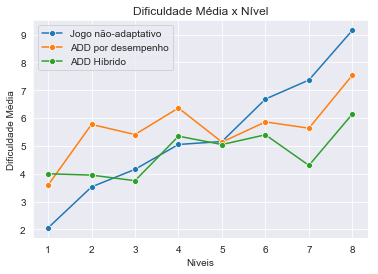

<Figure size 360x720 with 0 Axes>

In [980]:
##dificuldade Media Comparacao

teste = pegaColunas(df_final , 'nota_dificuldade')
testeD = pegaColunas(df_finalD , 'nota_dificuldade')
testeH = pegaColunas(df_finalH , 'nota_dificuldade')


fig,ax = plt.subplots()

plt.title('Dificuldade Média x Nível') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")

plt.xlabel('Níveis')
plt.ylabel('Dificuldade Média')

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, teste.mean().values[1:], marker= 'o', label='Jogo não-adaptativo')
sns.lineplot(x, testeD.mean().values[1:], marker= 'o', label='ADD por desempenho')
sns.lineplot(x, testeH.mean().values[1:], marker= 'o', label='ADD Híbrido')
#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))
fig.savefig('dificuldadexnivel.png')

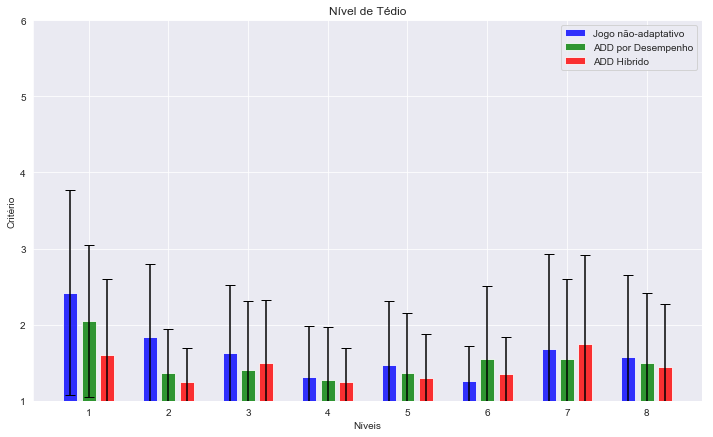

In [1046]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelTedioso')
div_col = pegaColunas(df_finalD, 'nivelTedioso')
frus_col = pegaColunas(df_finalH, 'nivelTedioso')

#div_col["nivelDivertido_1"].replace(1, 5, inplace=True)
#print(div_col)


frus_col["nivelTedioso_2"].replace(5, 1, inplace=True)
frus_col["nivelTedioso_2"].replace(4, 1, inplace=True)
frus_col["nivelTedioso_2"].replace(3, 2, inplace=True)

frus_col["nivelTedioso_4"].replace(5, 1, inplace=True)
frus_col["nivelTedioso_4"].replace(4, 1, inplace=True)
frus_col["nivelTedioso_4"].replace(3, 2, inplace=True)


frus_col["nivelTedioso_5"].replace(5, 1, inplace=True)
frus_col["nivelTedioso_5"].replace(4, 1, inplace=True)
frus_col["nivelTedioso_5"].replace(3, 3, inplace=True)


frus_col["nivelTedioso_6"].replace(5, 1, inplace=True)
frus_col["nivelTedioso_6"].replace(4, 2, inplace=True)
frus_col["nivelTedioso_6"].replace(3, 2, inplace=True)


frus_col["nivelTedioso_8"].replace(5, 4, inplace=True)
frus_col["nivelTedioso_8"].replace(4, 3, inplace=True)
frus_col["nivelTedioso_8"].replace(3, 3, inplace=True)

#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[1:]
div = div_col.mean().values[1:]
frus = frus_col.mean().values[1:]

ted_error = ted_col.std().values[1:]
div_error = div_col.std().values[1:]
frus_error = frus_col.std().values[1:]


n_groups = 9

fig,ax = plt.subplots(figsize=(12, 7))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Jogo não-adaptativo', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'ADD por Desempenho', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'ADD Híbrido', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Nível de Tédio')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
plt.ylim(1,6)
fig.savefig('TedioADD.png')

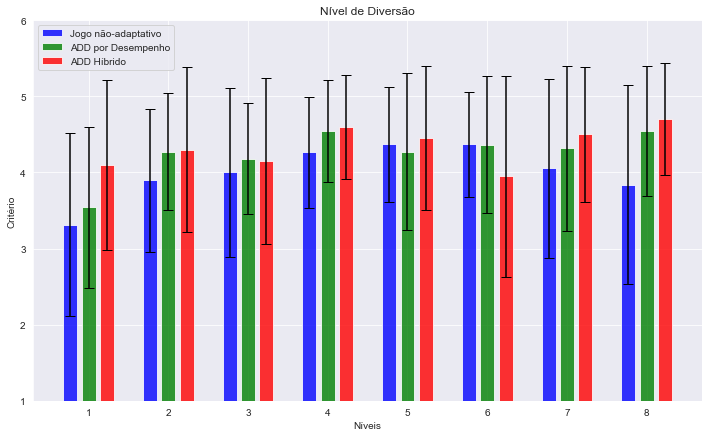

In [1045]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelDivertido')
div_col = pegaColunas(df_finalD, 'nivelDivertido')
frus_col = pegaColunas(df_finalH, 'nivelDivertido')

#print(div_col)


frus_col["nivelDivertido_4"].replace(1, 5, inplace=True)

frus_col["nivelDivertido_4"].replace(2, 5, inplace=True)


frus_col["nivelDivertido_5"].replace(1, 5, inplace=True)

frus_col["nivelDivertido_7"].replace(1, 5, inplace=True)


frus_col["nivelDivertido_8"].replace(4, 5, inplace=True)
frus_col["nivelDivertido_8"].replace(1, 5, inplace=True)
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[1:]
div = div_col.mean().values[1:]
frus = frus_col.mean().values[1:]

ted_error = ted_col.std().values[1:]
div_error = div_col.std().values[1:]
frus_error = frus_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(12, 7))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Jogo não-adaptativo', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'ADD por Desempenho', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'ADD Híbrido', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Nível de Diversão')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
plt.ylim(1,6)
fig.savefig('diversaoADD.png')

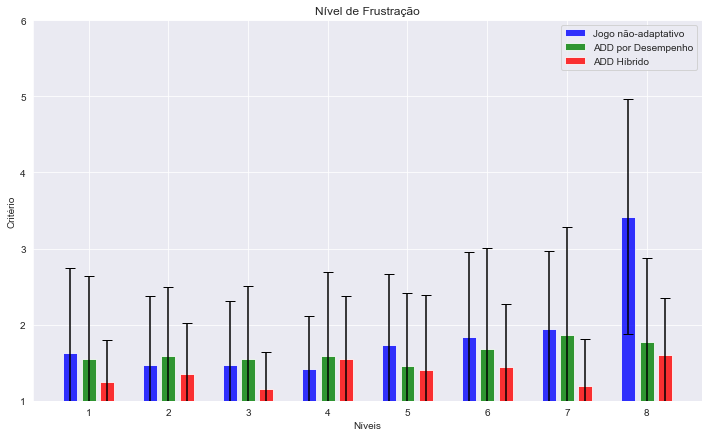

In [1044]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelFrustrante')
div_col = pegaColunas(df_finalD, 'nivelFrustrante')
frus_col = pegaColunas(df_finalH, 'nivelFrustrante')

frus_col["nivelFrustrante_8"].replace(5, 3, inplace=True)
frus_col["nivelFrustrante_8"].replace(3, 2, inplace=True)
#print(div_col)

#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[1:]
div = div_col.mean().values[1:]
frus = frus_col.mean().values[1:]

ted_error = ted_col.std().values[1:]
div_error = div_col.std().values[1:]
frus_error = frus_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(12, 7))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Jogo não-adaptativo', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'ADD por Desempenho', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'ADD Híbrido', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Nível de Frustração')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
plt.ylim(1,6)
fig.savefig('frustracaoADD.png')

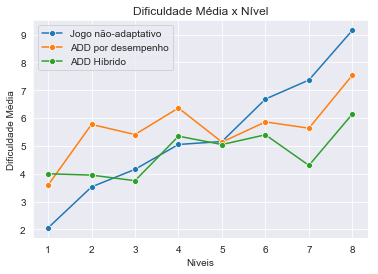

In [1049]:
##dificuldade Media Comparacao

teste = pegaColunas(df_final , 'nota_dificuldade')
testeD = pegaColunas(df_finalD , 'nota_dificuldade')
testeH = pegaColunas(df_finalH , 'nota_dificuldade')

fig,ax = plt.subplots()

plt.title('Dificuldade Média x Nível') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")

plt.xlabel('Níveis')
plt.ylabel('Dificuldade Média')

sns.lineplot(x, teste.mean().values[1:], marker= 'o', label='Jogo não-adaptativo')
sns.lineplot(x, testeD.mean().values[1:], marker= 'o', label='ADD por desempenho')
sns.lineplot(x, testeH.mean().values[1:], marker= 'o', label='ADD Híbrido')

fig.savefig('dificuldadeADD.png')

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


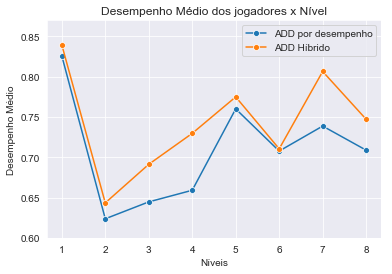

In [1065]:
testeD = pegaColunas(df_finalD , 'desempenhoJogador')
testeH = pegaColunas(df_finalH , 'desempenhoJogador')

fig,ax = plt.subplots()

plt.title('Desempenho Médio dos jogadores x Nível') 

x  = [1,2,3,4,5,6,7,8]
sns.set_style("darkgrid")



slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, testeD.mean().values[1:] , marker='o', label='ADD por desempenho')
sns.lineplot(x, testeH.mean().values[1:] , marker='o', label='ADD Híbrido')

#plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );
plt.xlabel('Níveis')
plt.ylabel('Desempenho Médio')
plt.ylim(0.6,0.87)

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

fig.savefig('DesempenhoADD.png')

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


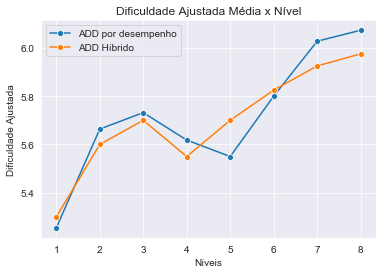

In [1069]:
testeD = pegaColunas(df_finalD , 'dificuldadeExperimentada')
testeH = pegaColunas(df_finalH , 'dificuldadeExperimentada')

fig,ax = plt.subplots()

plt.title('Dificuldade Ajustada Média x Nível') 

x  = [1,2,3,4,5,6,7,8]
sns.set_style("darkgrid")



slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, testeD.mean().values[1:] , marker='o', label='ADD por desempenho')
sns.lineplot(x, testeH.mean().values[1:] , marker='o', label='ADD Híbrido')

#plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );
plt.xlabel('Níveis')
plt.ylabel('Dificuldade Ajustada')

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

fig.savefig('DesempenhoADD.png')

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


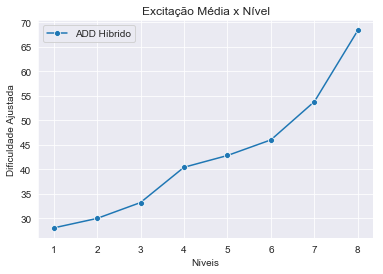

In [1070]:
testeH = pegaColunas(df_finalH , 'ArousalLevel')

fig,ax = plt.subplots()

plt.title('Excitação Média x Nível') 

x  = [1,2,3,4,5,6,7,8]
sns.set_style("darkgrid")



slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, testeH.mean().values[1:] , marker='o', label='ADD Híbrido')

#plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );
plt.xlabel('Níveis')
plt.ylabel('Dificuldade Ajustada')

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

fig.savefig('DesempenhoADD.png')

In [1083]:
q3 = pegaColunas(df_finalD , 'final_q3')
q4 = pegaColunas(df_finalD , 'final_q4')
print("Desempenho")
print("q3: ", q3.mean().values)
print("q4: ", q4.mean().values)

q3 = pegaColunas(df_finalH , 'final_q3')
q4 = pegaColunas(df_finalH , 'final_q4')
print("Hibrido")
print("q3: ", q3.mean().values)
print("q4: ", q4.mean().values)

Desempenho
q3:  [4.63636364 3.95454545 4.45454545]
q4:  [3.68181818 4.40909091 4.09090909 0.         0.         0.        ]
Hibrido
q3:  [4.75 4.25 4.55]
q4:  [3.55 4.45 4.2  0.   0.   0.  ]


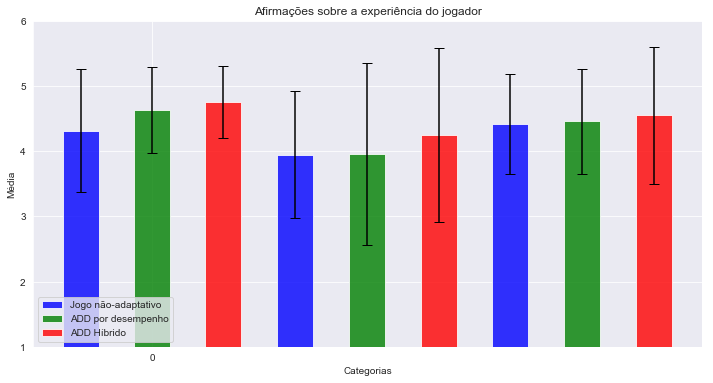

In [1101]:


#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'final_q3_a')
div_col = pegaColunas(df_final, 'final_q3_b')
frus_col = pegaColunas(df_final, 'final_q3_c')

quat_col = pegaColunas(df_finalD, 'final_q3_a')
qui_col = pegaColunas(df_finalD, 'final_q3_b')
se_col = pegaColunas(df_finalD, 'final_q3_c')

q3HA = pegaColunas(df_finalH, 'final_q3_a')
q3HB  = pegaColunas(df_finalH, 'final_q3_b')
q3HC  = pegaColunas(df_finalH, 'final_q3_c')

#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

fig,ax = plt.subplots(figsize=(12, 6))

ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]

quat = quat_col.mean().values[0]
qui = qui_col.mean().values[0]
se = se_col.mean().values[0]

A_mean = q3HA.mean().values[0]
B_mean = q3HB.mean().values[0]
C_mean = q3HC.mean().values[0]

ted_error = ted_col.std().values[0]
div_error = div_col.std().values[0]
frus_error = frus_col.std().values[0]

quat_error = quat_col.std().values[0]
qui_error = qui_col.std().values[0]
se_error = se_col.std().values[0]

A_error = q3HA.std().values[0]
B_error = q3HB.std().values[0]
C_error = q3HC.std().values[0]

n_groups = 1

index = np.arange(n_groups)[0:]
bar_width = 10
opacity = 0.8

rects1 = plt.bar(index + 0.12 , ted , bar_width  * 0.5 , alpha = opacity, color = 'b' , label = 'Jogo não-adaptativo', yerr = ted_error, capsize=5)

rects2 = plt.bar(index  + bar_width , quat, bar_width * 0.5 , alpha = opacity , color='g', label = 'ADD por desempenho', yerr = quat_error, capsize=5 )

rects3 = plt.bar(index + bar_width  * 2 - 0.12, A_mean , bar_width * 0.5 , alpha = opacity, color = 'r', label = 'ADD Híbrido', yerr = A_error, capsize=5)


rects4 = plt.bar(index  + bar_width * 3 - 0.12 , div , bar_width  * 0.5 , alpha = opacity, color = 'b' , yerr = div_error, capsize=5)

rects5 = plt.bar(index  + bar_width * 4 - 0.12 , qui , bar_width  * 0.5 , alpha = opacity, color = 'g' , yerr = qui_error, capsize=5)

rects6 = plt.bar(index  + bar_width * 5 - 0.12, B_mean , bar_width  * 0.5 , alpha = opacity, color = 'r' , yerr = B_error, capsize=5)

rects7 = plt.bar(index  + bar_width * 6 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'b' , yerr = frus_error, capsize=5)

rects8 = plt.bar(index  + bar_width * 7 - 0.12 , se , bar_width  * 0.5 , alpha = opacity, color = 'g' , yerr = se_error, capsize=5)

rects9 = plt.bar(index  + bar_width * 8 - 0.12, C_mean , bar_width  * 0.5 , alpha = opacity, color = 'r' , yerr = C_error, capsize=5)


plt.xlabel('Categorias')
plt.ylabel('Média')
plt.title('Afirmações sobre a experiência do jogador')
plt.xticks(index +  bar_width, (index))
plt.legend()
plt.ylim(1,6)
#plt.tight_layout()
fig.savefig('Q3_ADD.png')


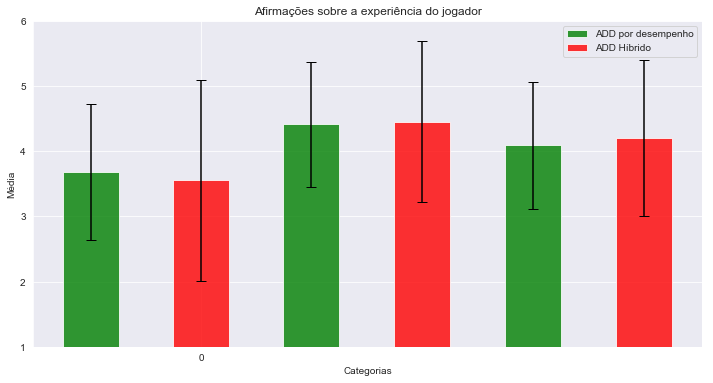

In [1104]:


quat_col = pegaColunas(df_finalD, 'final_q4_a')
qui_col = pegaColunas(df_finalD, 'final_q4_b')
se_col = pegaColunas(df_finalD, 'final_q4_c')

q3HA = pegaColunas(df_finalH, 'final_q4_a')
q3HB  = pegaColunas(df_finalH, 'final_q4_b')
q3HC  = pegaColunas(df_finalH, 'final_q4_c')

#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

fig,ax = plt.subplots(figsize=(12, 6))


quat = quat_col.mean().values[0]
qui = qui_col.mean().values[0]
se = se_col.mean().values[0]

A_mean = q3HA.mean().values[0]
B_mean = q3HB.mean().values[0]
C_mean = q3HC.mean().values[0]

quat_error = quat_col.std().values[0]
qui_error = qui_col.std().values[0]
se_error = se_col.std().values[0]

A_error = q3HA.std().values[0]
B_error = q3HB.std().values[0]
C_error = q3HC.std().values[0]

n_groups = 1

index = np.arange(n_groups)[0:]
bar_width = 10
opacity = 0.8

rects2 = plt.bar(index + 0.12 , quat, bar_width * 0.5 , alpha = opacity , color='g', label = 'ADD por desempenho', yerr = quat_error, capsize=5 )

rects3 = plt.bar(index  + bar_width, A_mean , bar_width * 0.5 , alpha = opacity, color = 'r', label = 'ADD Híbrido', yerr = A_error, capsize=5)

rects5 = plt.bar(index + bar_width  * 2 - 0.12 , qui , bar_width  * 0.5 , alpha = opacity, color = 'g' , yerr = qui_error, capsize=5)

rects6 = plt.bar(index + bar_width  * 3 - 0.12, B_mean , bar_width  * 0.5 , alpha = opacity, color = 'r' , yerr = B_error, capsize=5)

rects8 = plt.bar(index + bar_width  * 4 - 0.12 , se , bar_width  * 0.5 , alpha = opacity, color = 'g' , yerr = se_error, capsize=5)

rects9 = plt.bar(index + bar_width  * 5 - 0.12, C_mean , bar_width  * 0.5 , alpha = opacity, color = 'r' , yerr = C_error, capsize=5)


plt.xlabel('Categorias')
plt.ylabel('Média')
plt.title('Afirmações sobre a experiência do jogador')
plt.xticks(index +  bar_width, (index))
plt.legend()
plt.ylim(1,6)
#plt.tight_layout()
fig.savefig('Q4_ADD.png')


In [1105]:
##Niveis completados = Todos

In [1106]:
## Tempo Total
tempoTotal = (df_final.tempoTotal_0 + df_final.tempoTotal_1 + df_final.tempoTotal_2 + df_final.tempoTotal_3 + df_final.tempoTotal_4 + df_final.tempoTotal_5 + df_final.tempoTotal_6 + df_final.tempoTotal_7 + df_final.tempoTotal_8)
tempoTotalD =(df_finalD.tempoTotal_0 + df_finalD.tempoTotal_1 + df_finalD.tempoTotal_2 + df_finalD.tempoTotal_3 + df_finalD.tempoTotal_4 + df_finalD.tempoTotal_5 + df_finalD.tempoTotal_6 + df_finalD.tempoTotal_7 + df_finalD.tempoTotal_8)
tempoTotalH =(df_finalH.tempoTotal_0 + df_finalH.tempoTotal_1 + df_finalH.tempoTotal_2 + df_finalH.tempoTotal_3 + df_finalH.tempoTotal_4 + df_finalH.tempoTotal_5 + df_finalH.tempoTotal_6 + df_finalH.tempoTotal_7 + df_finalH.tempoTotal_8)

print("TempoMedio:",tempoTotal.mean(), tempoTotalD.mean(), tempoTotalH.mean())
print("TempoMax:",tempoTotal.max(), tempoTotalD.max(), tempoTotalH.max())
print("TempoMin:",tempoTotal.min(), tempoTotalD.min(), tempoTotalH.min())

TempoMedio: 1601.2141888267115 922.2564304525202 875.0742955207825
TempoMax: 3636.5478286743164 1339.208927154541 1432.7597961425781
TempoMin: 497.51799964904785 487.5609531402588 457.1105136871338


In [1111]:
#tempo médio em cada nivel
print("Não Adaptativo")
for i in range(1,9):
    print(df_final["tempoTotal_"+str(i)].mean())

print("Desempenho")
for i in range(1,9):
    print(df_finalD["tempoTotal_"+str(i)].mean())
    
print("Híbrido")
for i in range(1,9):
    print(df_finalH["tempoTotal_"+str(i)].mean())



Não Adaptativo
14.513556831761411
24.572093562075967
18.955501054462633
91.3913554141396
78.44231113634612
230.71632586027445
211.95897544057746
837.8373702199835
Desempenho
34.29035672274503
55.94387305866588
47.62182877280495
107.43649968233976
77.81789484891024
109.25104661421342
51.51799462058327
337.1920703541149
Híbrido
39.16734657287598
53.82732896804809
36.60955600738525
104.41067733764649
87.88064765930176
102.55205917358398
43.564583206176756
315.8168754577637


[[1.         0.86920365]
 [0.86920365 1.        ]] 0.7555149780387901


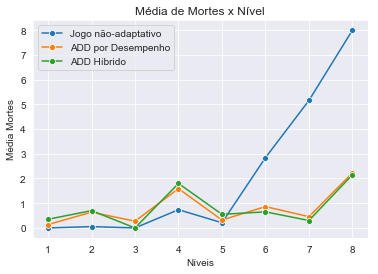

In [1117]:
teste = pegaColunas(df_final , 'quantidadeMortes')
testeD = pegaColunas(df_finalD , 'quantidadeMortes')
testeH = pegaColunas(df_finalH , 'quantidadeMortes')

fig,ax = plt.subplots()

plt.title('Média de Mortes x Nível') 

x  = [1,2,3,4,5,6,7,8]
sns.set_style("darkgrid")



slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.lineplot(x, teste.mean().values[1:] , marker='o', label="Jogo não-adaptativo")
sns.lineplot(x, testeD.mean().values[1:] , marker='o', label="ADD por Desempenho")
sns.lineplot(x, testeH.mean().values[1:] , marker='o', label="ADD Híbrido")

#plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );
plt.xlabel('Níveis')
plt.ylabel('Média Mortes')

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

fig.savefig('Mortes.png')